# In this notebook, we explore implementation of LDA from scratch

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load dataset
dataset = pd.read_csv('dataset.csv')

In [3]:
dataset

,x1,x2,y
0,2.497,1.862,0
1,2.648,3.523,0
2,1.766,1.766,0
3,3.579,2.767,0
4,1.531,2.543,0
5,1.537,1.534,0
6,2.242,0.087,0
7,0.275,1.438,0
8,0.987,2.314,0
9,1.092,0.588,0


First we separate data into two sets based on classes.

In [55]:
X = np.array(dataset[['x1','x2']])
X1 = dataset[dataset['y']==1]
X0 = dataset[dataset['y']==0]

Plot scatter plot to visualize two classes.

Text(0.5, 1.0, 'Original Data')

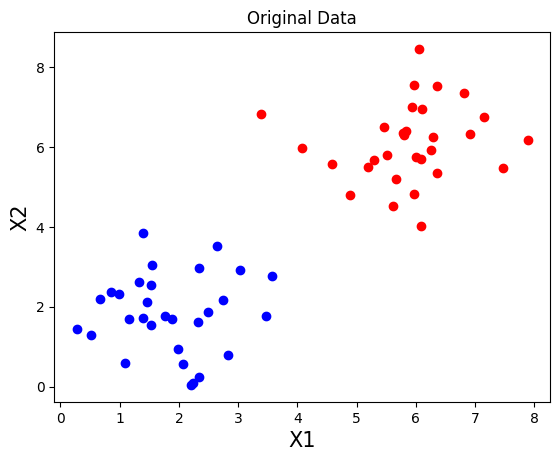

In [5]:
plt.scatter(X1['x1'],X1['x2'],color='red')
plt.scatter(X0['x1'],X0['x2'],color='blue')
plt.xlabel('X1',fontsize=15)
plt.ylabel('X2',fontsize=15)
plt.title('Original Data')

Compute mean for each class.

In [56]:
mean_class_1 = np.array([np.mean(X1['x1']).round(3),np.mean(X1['x2']).round(3)])
mean_class_1

array([5.894, 6.099])

In [7]:
mean_class_0 = np.array([np.mean(X0['x1']).round(3),np.mean(X0['x2']).round(3)])

Compute within-class scatter matrix (within class variance)

In [57]:
x1 = np.array(X1[['x1','x2']])
x0 = np.array(X0[['x1','x2']])
class_1_var = (x1 - mean_class_1).T @ (x1 - mean_class_1)
class_0_var = (x0 - mean_class_0).T @ (x0 - mean_class_0)
total_var = class_1_var + class_0_var
total_var

array([[44.883074,  3.895435],
       [ 3.895435, 55.696335]])

Compute bewteen class variance

In [9]:
mean_diff = (mean_class_1 - mean_class_0).reshape(-1,1)

In [10]:
bewteen_class_var = mean_diff @ mean_diff.T

In [11]:
bewteen_class_var

array([[16.305444, 17.218032],
       [17.218032, 18.181696]])

Solve for eigen vectors

In [12]:
eigvals,eigenvects = np.linalg.eig(np.linalg.inv(total_var) @ bewteen_class_var)

In [13]:
eigvals

array([6.39953921e-01, 1.11022302e-16])

In [14]:
eigenvects

array([[ 0.76446228, -0.72608691],
       [ 0.64466846,  0.68760294]])

Pick eigen vector with largest eigen value

In [15]:
w = eigenvects[:, np.argmax(eigvals)]

In [16]:
w

array([0.76446228, 0.64466846])

In [17]:
# convert to column vector
w = w.reshape(-1,1)

In [18]:
w

array([[0.76446228],
       [0.64466846]])

Project datapoints onto the eigen vector chosen

In [19]:
proj1 = x1 @ w
proj0 = x0 @ w

In [22]:
# convert the 1-d projected points to 2-d space
w_unit = w / np.linalg.norm(w)
proj1_2d = proj1 @ w_unit.T
proj0_2d = proj0 @ w_unit.T

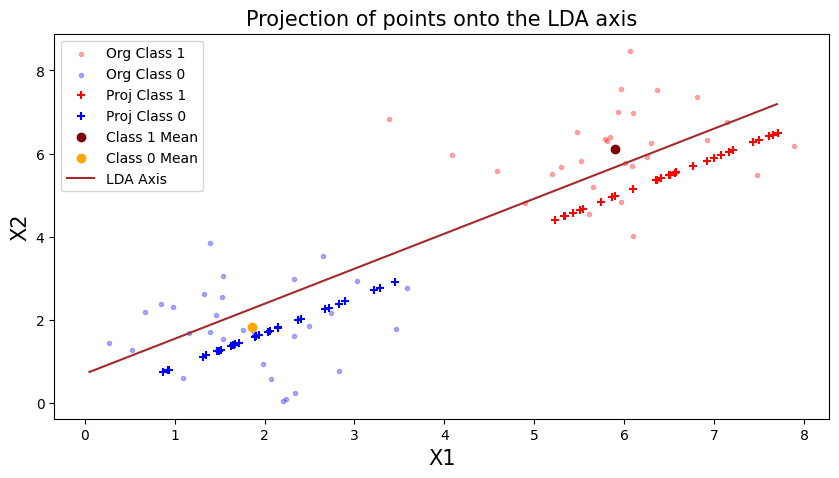

In [53]:
plt.figure(figsize = (10,5))
plt.scatter(X1['x1'],X1['x2'],color='red',label='Org Class 1',alpha=0.3,marker='.')
plt.scatter(X0['x1'],X0['x2'],color='blue',label='Org Class 0',alpha=0.3,marker='.')

plt.scatter(proj1_2d[:,0],proj1_2d[:,1],color='red',label='Proj Class 1',marker='+')
plt.scatter(proj0_2d[:,0],proj0_2d[:,1],color='blue',label='Proj Class 0',marker='+')

plt.scatter(mean_class_1[0],mean_class_1[1],color='maroon',label='Class 1 Mean')
plt.scatter(mean_class_0[0],mean_class_0[1],color='orange',label='Class 0 Mean')

origin = np.mean(X, axis=0)
line_points = np.vstack([origin - 5 * w_unit.ravel(), origin + 5 * w_unit.ravel()])
plt.plot(line_points[:, 0], line_points[:, 1], color='brown', label='LDA Axis')

plt.xlabel('X1',fontsize=15)
plt.ylabel('X2',fontsize=15)
plt.title('Projection of points onto the LDA axis',fontsize=15)
plt.legend()